In [150]:
import os
import pandas as pd
from glob import glob 
import scipy.signal
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from scipy.signal import butter, lfilter
%matplotlib inline

# BandPass Function

In [151]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [152]:
data, sr = librosa.load('validation/a0001.wav', 1000) #samplerate =1000

data

array([-0.00215853, -0.00328316, -0.00059597, ..., -0.01270812,
       -0.01098489, -0.00752986], dtype=float32)

In [153]:
fs = 1000.0
lowcut = 20.0
highcut = 450.0

newData = butter_bandpass_filter(data, lowcut, highcut, fs) #implementing bandpass filter

In [154]:
newData

array([-1.05187632e-03, -2.24435751e-03,  1.57698480e-05, ...,
        1.37757499e-03,  2.31099985e-03,  4.24114357e-03])

In [155]:
MF = np.mean(data)/np.max(data)

In [156]:
MFN = np.mean(newData)/np.max(newData)

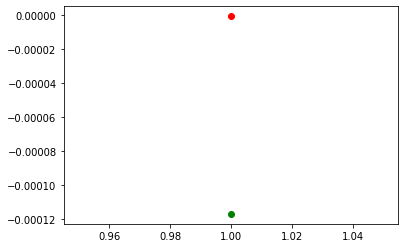

In [157]:
plt.plot(1, MF, 'o', color='green')
plt.plot(1, MFN, 'o', color='red')
plt.show()

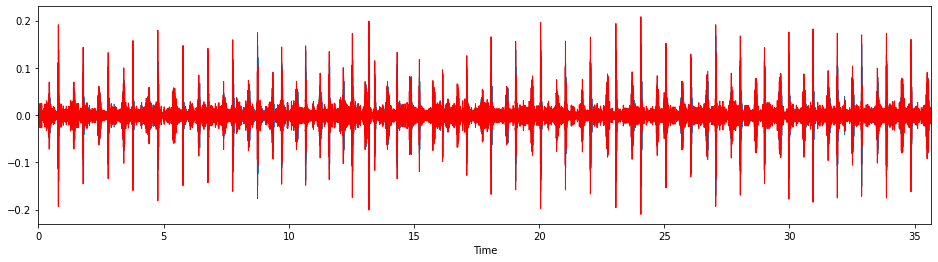

In [158]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(newData, sr=1000)
librosa.display.waveplot(data, color='r', sr=1000)

# Fourier Transform

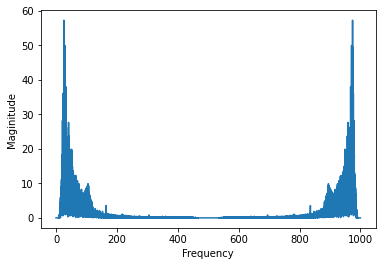

In [159]:
fft = np.fft.fft(newData, len(newData))
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.xlabel('Frequency')
plt.ylabel('Maginitude')
plt.show()

# Loading data

In [160]:
ds = pd.read_csv('validation/REFERENCE.csv', names=['sound', 'stat'])
files = glob('validation/*.wav')

In [161]:
labs = []
train_audio = []
for file in files:
    data, rate = librosa.load(file, sr=1000)
    
    lowcut = 20.0
    highcut = 450.0

    data = butter_bandpass_filter(data, lowcut, highcut, rate)
    fname = os.path.basename(file)
    
    ID = fname.replace('.wav', '')
    CLASS = ds.loc[ds['sound'] == ID]
    
    print("{}: samples in waveform: {}".format(fname, data.size))
    
    
    train_audio.append(data)
    labs.append( CLASS.values.tolist()[0][1])
    
train_audio, labs

a0001.wav: samples in waveform: 35666
a0002.wav: samples in waveform: 20829
a0003.wav: samples in waveform: 30720
a0004.wav: samples in waveform: 35597
a0005.wav: samples in waveform: 35666
a0006.wav: samples in waveform: 20759
a0007.wav: samples in waveform: 35666
a0008.wav: samples in waveform: 35806
a0009.wav: samples in waveform: 35806
a0010.wav: samples in waveform: 35736
a0011.wav: samples in waveform: 35597
a0012.wav: samples in waveform: 30860
a0013.wav: samples in waveform: 35666
a0014.wav: samples in waveform: 35736
a0015.wav: samples in waveform: 35736
a0016.wav: samples in waveform: 30790
a0017.wav: samples in waveform: 35666
a0018.wav: samples in waveform: 20898
a0019.wav: samples in waveform: 30860
a0020.wav: samples in waveform: 35666
a0021.wav: samples in waveform: 35597
a0022.wav: samples in waveform: 36154
a0023.wav: samples in waveform: 30581
a0024.wav: samples in waveform: 20689
a0025.wav: samples in waveform: 31138
a0026.wav: samples in waveform: 35597
a0027.wav: s

e00024.wav: samples in waveform: 21193
e00025.wav: samples in waveform: 22607
e00026.wav: samples in waveform: 8589
e00027.wav: samples in waveform: 31488
e00028.wav: samples in waveform: 13306
e00029.wav: samples in waveform: 31829
e00030.wav: samples in waveform: 29443
e00031.wav: samples in waveform: 50771
e00032.wav: samples in waveform: 31167
e00033.wav: samples in waveform: 9107
e00034.wav: samples in waveform: 11090
e00035.wav: samples in waveform: 33668
e00036.wav: samples in waveform: 14406
e00037.wav: samples in waveform: 41783
e00038.wav: samples in waveform: 12459
e00039.wav: samples in waveform: 9667
e00040.wav: samples in waveform: 41697
e00041.wav: samples in waveform: 22955
e00042.wav: samples in waveform: 22488
e00043.wav: samples in waveform: 28511
e00044.wav: samples in waveform: 14437
e00045.wav: samples in waveform: 21757
e00046.wav: samples in waveform: 14868
e00047.wav: samples in waveform: 26528
e00048.wav: samples in waveform: 22129
e00049.wav: samples in wavef

([array([-1.05187632e-03, -2.24435751e-03,  1.57698480e-05, ...,
          1.37757499e-03,  2.31099985e-03,  4.24114357e-03]),
  array([0.00447654, 0.01558682, 0.01028537, ..., 0.02022462, 0.01799158,
         0.01520304]),
  array([-0.00207354, -0.00582337, -0.00470283, ...,  0.00157646,
          0.00192278,  0.00194798]),
  array([ 0.00523959,  0.0134156 ,  0.00832817, ..., -0.00262308,
         -0.00194727, -0.00166827]),
  array([-0.00077109, -0.00197491, -0.00242912, ...,  0.01913491,
          0.01556865,  0.01734181]),
  array([0.01728215, 0.05431604, 0.05639708, ..., 0.01225022, 0.01320193,
         0.01277922]),
  array([ 0.02222534,  0.05861497,  0.03853064, ..., -0.02081952,
         -0.02319139, -0.02306858]),
  array([-0.00956946, -0.02557501, -0.01886907, ...,  0.00495399,
          0.0033724 ,  0.0057397 ]),
  array([-0.00172079, -0.00536846, -0.00662385, ...,  0.00833003,
          0.00835515,  0.00403616]),
  array([-0.00076994, -0.00298363, -0.00434631, ..., -0.00163

In [194]:
L = []
for i in range(len(labs)):
    L.append((train_audio[i], labs[i]))

In [215]:
L[0][0]

array([-1.05187632e-03, -2.24435751e-03,  1.57698480e-05, ...,
        1.37757499e-03,  2.31099985e-03,  4.24114357e-03])

# Calculating MF(Ratio of mean and max value of Fourier Trans. ) of Data

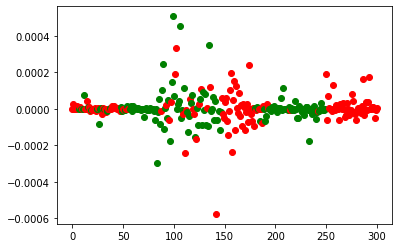

In [222]:
for i in range(len(L)):
    MF = np.mean(L[i][0])/np.max(L[i][0])
                 
    if(L[i][1] > 0):
        plt.plot(i, MF, 'o', color='red')
    else:
        plt.plot(i, MF, 'o', color='green')

plt.show()
    

In [168]:
dataset[1]

TypeError: 'map' object is not subscriptable